In [45]:
# tutorial: https://www.kaggle.com/code/meetnagadia/bitcoin-price-prediction-using-lstm
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [46]:
maindf = pd.read_csv('../data/ETH-USD.csv')

In [47]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-28,442.290009,443.618011,419.683014,422.364990,422.364990,1360790016
1,2018-06-29,422.587006,441.792999,407.946991,436.009003,436.009003,1564499968
2,2018-06-30,436.209015,458.796997,436.209015,455.179993,455.179993,1475939968
3,2018-07-01,455.242004,457.139008,446.385010,453.917999,453.917999,1511730048
4,2018-07-02,453.824005,479.130005,447.110992,475.346985,475.346985,1625789952


In [48]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,1244.240324,1281.162770,1203.197244,1244.815864,1244.815864,1.371499e+10
std,1201.921865,1237.977956,1160.468926,1201.388677,1201.388677,1.041622e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,1.084810e+09
25%,209.178719,213.733391,203.658051,208.977218,208.977218,6.581593e+09
50%,659.185059,711.393555,646.616211,682.642334,682.642334,1.136726e+10
75%,1878.279663,1920.398559,1845.860535,1879.261170,1879.261170,1.836356e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [49]:
maindf.isnull().values.sum()

0

In [50]:
maindf.isnull().values.any()

False

In [51]:
maindf.shape

(1827, 7)

In [52]:
sd = maindf.iloc[0][0]
ed = maindf.iloc[-1][0]

print("Start Date: ", sd)
print("End Date: ", ed)

Start Date:  2018-06-28
End Date:  2023-06-28


In [53]:
maindf.drop(maindf[['Adj Close', 'Volume']], axis=1, inplace=True)

In [54]:
maindf.head()

,Date,Open,High,Low,Close
0,2018-06-28,442.290009,443.618011,419.683014,422.364990
1,2018-06-29,422.587006,441.792999,407.946991,436.009003
2,2018-06-30,436.209015,458.796997,436.209015,455.179993
3,2018-07-01,455.242004,457.139008,446.385010,453.917999
4,2018-07-02,453.824005,479.130005,447.110992,475.346985


In [55]:
df = maindf[maindf['Date'] >= '2022-01-01']

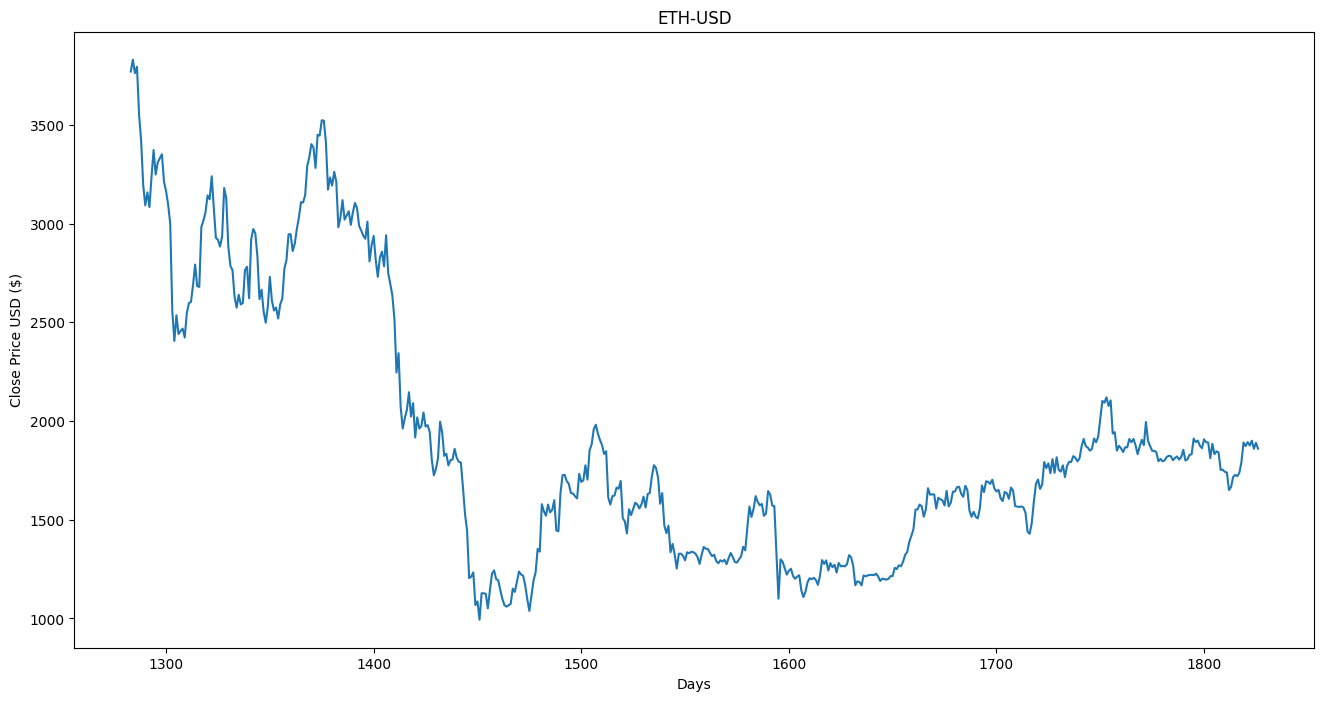

In [56]:
plt.figure(figsize=(16,8))
plt.title('ETH-USD')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [57]:
del df['Date']

In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(df).reshape(-1,1))

In [59]:
training_size=int(len(scaled_data)*0.60)
test_size=len(scaled_data)-training_size
train_data,test_data=scaled_data[0:training_size,:],scaled_data[training_size:len(scaled_data),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1305, 1)
test_data:  (871, 1)


In [60]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [61]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1289, 15)
y_train:  (1289,)
X_test:  (855, 15)
y_test (855,)


In [62]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [63]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
41/41 [==============================] - 1s 5ms/step - loss: 0.1215 - val_loss: 0.0146
Epoch 2/200
41/41 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0024
Epoch 3/200
41/41 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 7.2932e-04
Epoch 4/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 3.3494e-04
Epoch 5/200
41/41 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 2.2135e-04
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 3.4584e-04
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 9.8277e-04 - val_loss: 2.5156e-04
Epoch 8/200
41/41 [==============================] - 0s 3ms/step - loss: 8.4752e-04 - val_loss: 1.9042e-04
Epoch 9/200
41/41 [==============================] - 0s 2ms/step - loss: 8.2773e-04 - val_loss: 1.8600e-04
Epoch 10/200
41/41 [==============================] - 0s 3ms/step - l

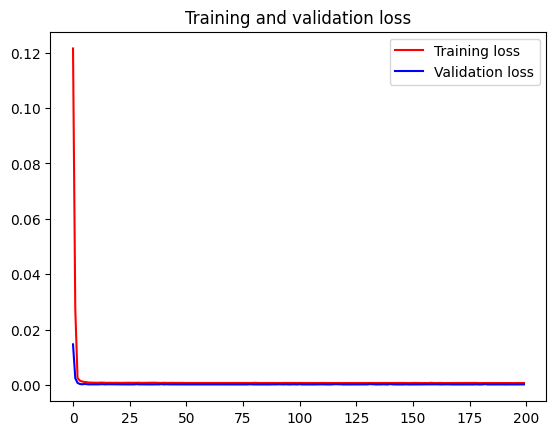

<Figure size 640x480 with 0 Axes>

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


In [65]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

27/27 [==============================] - 0s 718us/step


((1289, 1), (855, 1))

In [66]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [67]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  80.55820113660158
Train data MSE:  6489.623770365156
Train data MAE:  56.94786825504267
-------------------------------------------------------------------------------------
Test data RMSE:  40.43439722471562
Test data MSE:  1634.9404789260902
Test data MAE:  30.525605059448093


In [68]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9897885323390688
Test data explained variance regression score: 0.9775603707616357


In [69]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.988647271600182
Test data R2 score: 0.973333514289109


In [70]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.001635722816461697
Test data MGD:  0.000588006227597643
----------------------------------------------------------------------
Train data MPD:  3.050946929892235
Test data MPD:  0.9696763153198387
